- Sobhan Moradian Daghigh
- 6/1/2022
- DIP - HW03 - Q5

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import glob

In [2]:
def load_datas(folder_name):
    images = []
    names = []
    files = glob.glob('{}*.png'.format(folder_name))
    for file in files:
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        name = file.split('\\')[-1][:-4]
        print('   |_ Image {:<7s} loaded.'.format(name))
        
        images.append(img)
        names.append(name)               
    return images, names

In [3]:
images, names = load_datas('./inputs/P5/')

   |_ Image biden   loaded.
   |_ Image raisi   loaded.
   |_ Image rouhani loaded.
   |_ Image trump   loaded.


In [4]:
def plotter(images, names=None, subplots=None, gray=False):
    if subplots is None:
        plt.imshow(images, cmap='gray') if gray else plt.imshow(images)
        plt.title(names)
        plt.axis('off')
    else:
        fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(subplots[1] * 5, subplots[0] * 5))
        for i, (img, name, ax) in enumerate(zip(images, names, fig.axes)):
            ax.imshow(img, cmap='gray') if gray else ax.imshow(img)
            ax.set_title(name)
            ax.axis('off')
    plt.show()

In [67]:
def mouse_click(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        param.append([x, y])

In [68]:
def select_alignment_cordinates(img, points):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imshow('Choose', img)
    cv2.setMouseCallback('Choose', mouse_click, points)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [120]:
def align_imgs(img1, img2):
    rows, cols, ch = img1.shape
    points = []
    select_alignment_cordinates(img1, points)
    pts1 = np.float32(points)

    points = []
    select_alignment_cordinates(img2, points)
    pts2 = np.float32(points)
    
    M = cv2.getAffineTransform(pts1, pts2)
    dst = cv2.warpAffine(img1, M, (cols, rows))
    plotter([img1, img2, dst], names=['img1', 'img2', 'Transformed'], subplots=(1, 3))
    return dst

In [73]:
def fourier_transform(img):
    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)
    magnitude_spectrum = 20 * np.log(np.abs(fft_shift))
    return magnitude_spectrum, fft_shift

In [74]:
def inverse_fourier_transform(img):
    ifft = np.fft.ifftshift(img)
    ifft = np.fft.ifft2(ifft)
    inversed = np.abs(ifft).astype(np.uint8)
    return inversed

In [99]:
def lowpass_filtering(img, ksize=(5, 5), sigma=3):
    return cv2.GaussianBlur(img, ksize, sigma)

In [162]:
def highpass_filtering(img, ksize=(5, 5), sigma=3):
    return img - cv2.GaussianBlur(img, ksize, sigma) + 127

In [384]:
def normalizer(img):
    maximum = img.max()
    minimum = img.min()
    return ((img - minimum) / (maximum - minimum) * 255).astype(np.uint8)

### Part A.

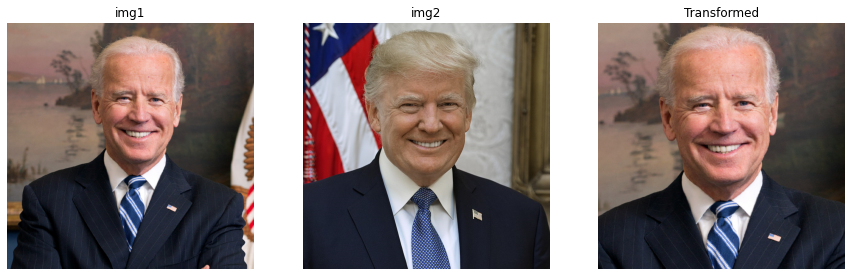

In [121]:
align_img = align_imgs(images[0], images[3])

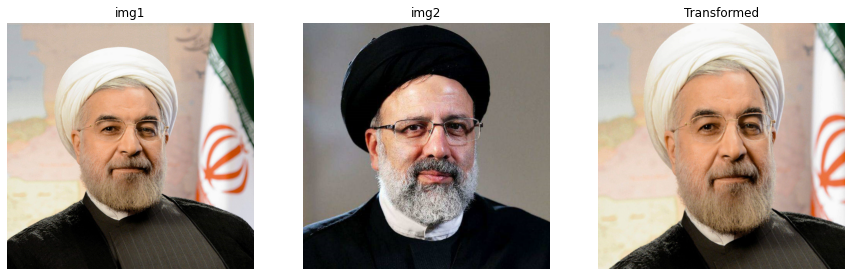

In [387]:
align_img = align_imgs(images[2], images[1])

### Part B.

In [301]:
def filtering(images, names):
    processed_images = []
    align_img = align_imgs(images[0], images[1])      
    for i, (img, name) in enumerate(zip([align_img, images[1]], names)):
        print('   |_ image: {}'.format(name))
        plots = []
        plots.append(img)
        
        if not i:
            filtered = lowpass_filtering(img, ksize=(21, 21), sigma=0)
        elif i:
            filtered = highpass_filtering(img, ksize=(21, 21), sigma=0)
        
        plots.append(filtered)
        channels = [filtered[:, :, 0], filtered[:, :, 1], filtered[:, :, 2]]
        for channel in channels:
            magnitude_spectrum, _ = fourier_transform(channel)
            plots.append(normalizer(magnitude_spectrum))
        plotter(plots, ['Original', 'filtered', 'magnitude_ch1', 'magnitude_ch2', 'magnitude_ch3'], subplots=(1, len(plots)), gray=True)
    
        processed_images.append(plots)
    return processed_images

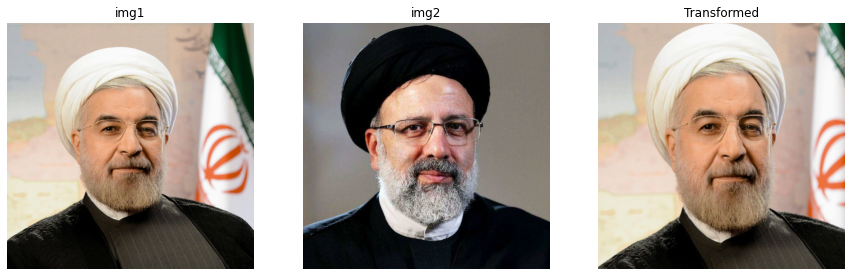

   |_ image: rouhani


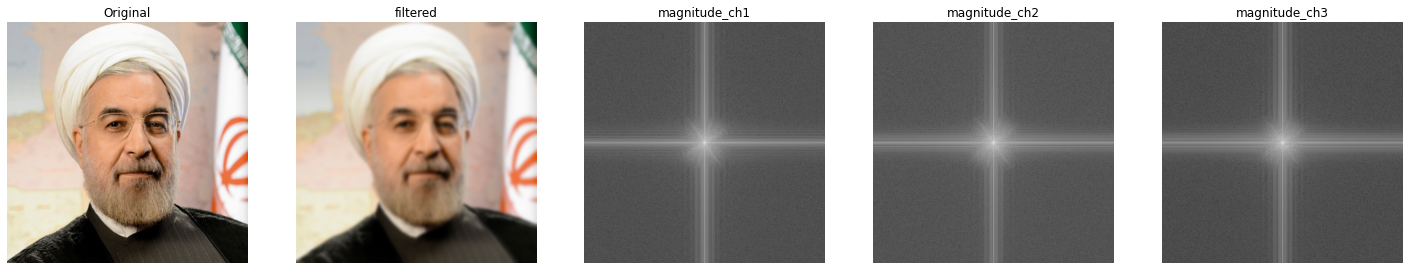

   |_ image: raisi


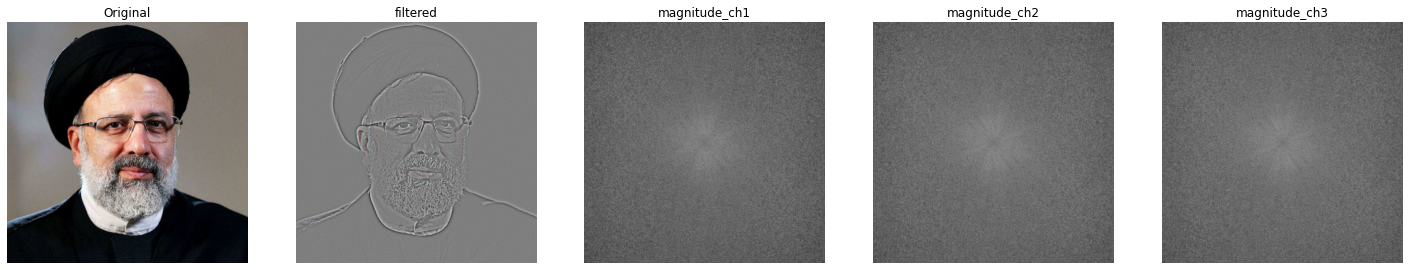

In [330]:
processed_images = filtering([images[2], images[1]], [names[2], names[1]])

### Part C.

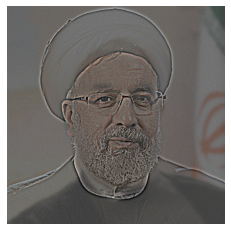

In [334]:
raisi_rouhani = cv2.addWeighted(processed_images[0][1], 0.2, processed_images[1][1], 1.3, -100.0)
plotter(raisi_rouhani)

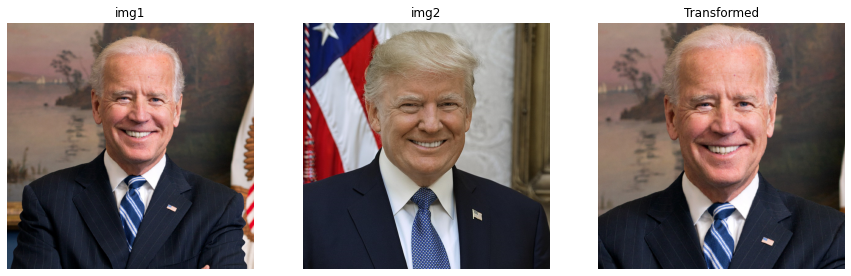

   |_ image: raisi


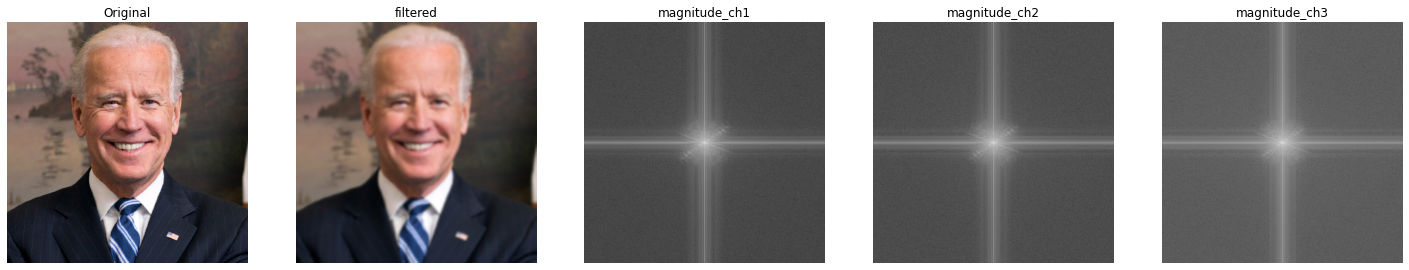

   |_ image: trump


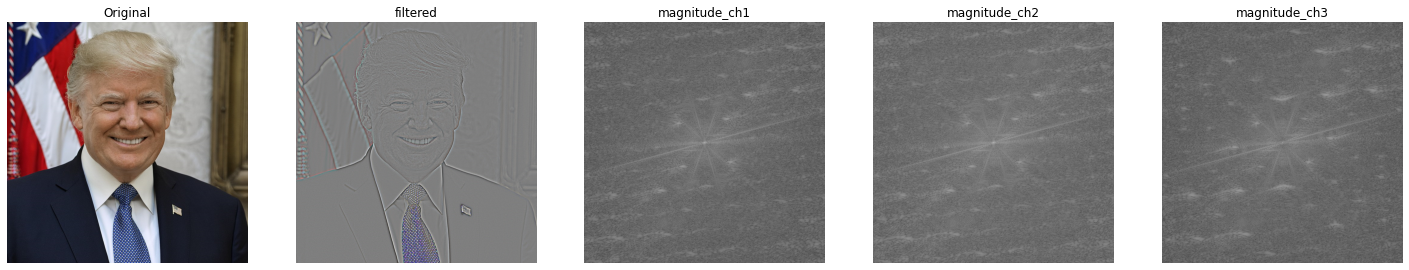

In [337]:
processed_images = filtering([images[0], images[3]], [names[1], names[3]])

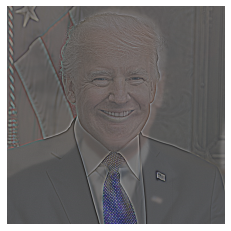

In [362]:
biden_trump = cv2.addWeighted(processed_images[0][1], 0.15, processed_images[1][1], 1.1, -60.0)
plotter(biden_trump)

### Part D.

In [378]:
frames = []
frames.append(biden_trump)    
for i in range(5):
    frame = lowpass_filtering(biden_trump, ksize=(21, 21), sigma=(i+1) * 3)
    frames.append(frame)

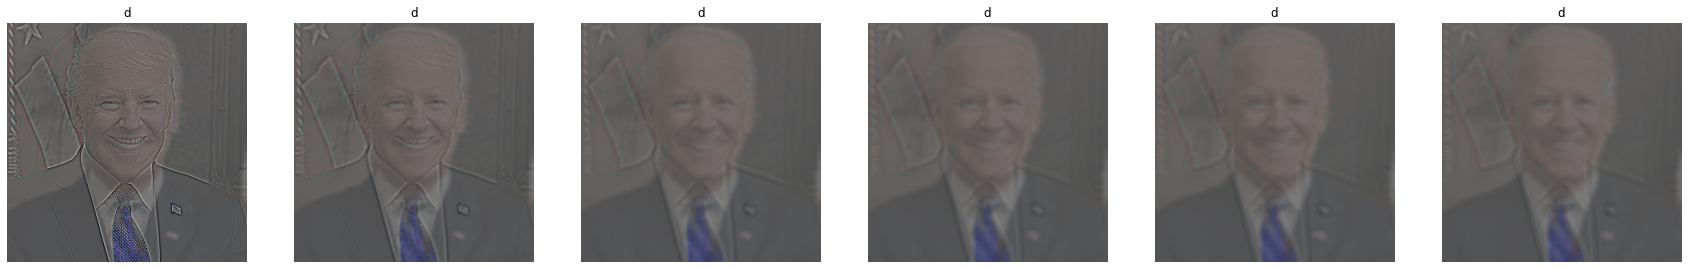

In [379]:
plotter(frames, names=['d'] * len(frames), subplots=(1, len(frames)))

In [382]:
frames = []
frames.append(raisi_rouhani)    
for i in range(5):
    frame = lowpass_filtering(raisi_rouhani, ksize=(21, 21), sigma=(i+1) * 5)
    frames.append(frame)

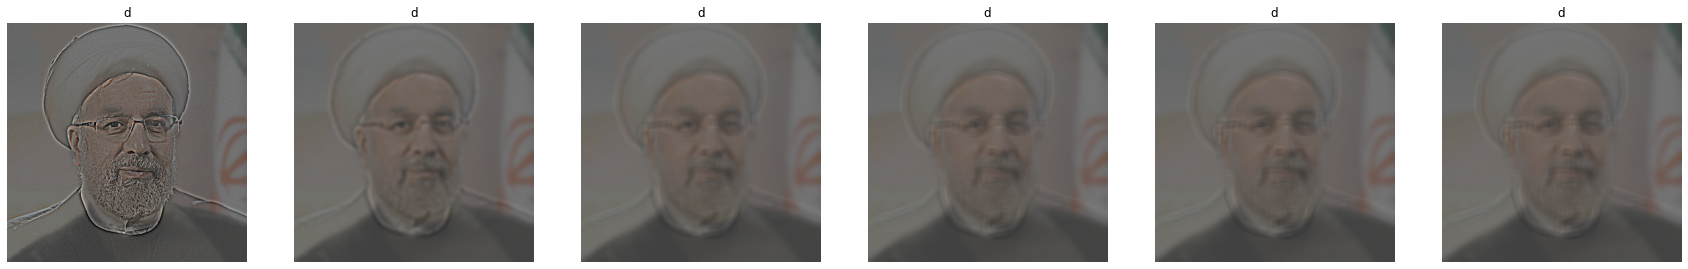

In [383]:
plotter(frames, names=['d'] * len(frames), subplots=(1, len(frames)))

### Incredible :)